<a href="https://colab.research.google.com/github/wcortegac12-cpu/202023509_ORTEGA_GEOG5990/blob/main/Copy_of_202023509_ORTEGA_GEOG5990M_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GEOG5990M Final Assignment**

Student ID number: 202023509

# **CAN WE IDENTIFY THE MAIN AIR CONTAMINANTS PER UPZ AND LOCALITY IN BOGOTA, COLOMBIA?**



# **BACKGROUND/CONTEXT**

Air quality is one of the most important environmental factors in urban areas, as rapid growth in these areas results in various types of pollution, including air pollution (Lu et al., 2021). This poses a significant health problem because these polluting particles pose lethal risks (Manisalidis et al., 2020), not only to humans but also to the biodiversity of urban ecosystems (Marselle et al., 2021). Therefore, air quality monitoring stations are currently established in cities, primarily measuring common pollutants such as carbon monoxide, nitrogen dioxide, and particulate matter (Liang et al., 2023). These stations also allow for the analysis of variables such as temperature, humidity, and radiation, which directly affect the concentration of these toxic particles in the air.

Multiple studies have found that air quality deteriorates more in large cities due to factors such as industry, transportation, and resource exploitation (Wang et al., 2023). Environmental policies to combat air pollution are underway, making it crucial to obtain real-time data on this issue, which is of great concern for the quality of life in metropolitan areas (Escobar and Vallejos-Romero, 2023). Latin America is developing methodologies to mitigate this impact (Franco et al., 2019), which is why Bogotá, the capital of Colombia with over eight million inhabitants and approximately ten million in its metropolitan area, was selected as a case study. Bogotá was chosen because it exhibits multiple pollution factors: open-air mass transit, numerous ongoing road construction projects, industrialization, and even mining in some areas (Espinosa et al., 2017). Air quality levels typically decrease due to climatic factors; however, they have reached alarmingly high levels in recent decades (Gaitan et al., 2007).

The objective is to review the air quality indices from the city's meteorological stations and create a map that uses UPZs (zonal planning units) to visually illustrate the dynamics of the city's main pollutants. These pollutants will be determined by their values and importance throughout this analysis. Finally, a simple graphical analysis will be conducted to classify these UPZs by locality, resulting in easily understandable graphs for the general public. One of the ultimate goals is to make this study accessible to everyone in the simplest way possible.


In [1]:
# read in required packages
!pip install palettable==3.3.0
!pip install descartes==1.1.0
!pip install pysal==2.6.0
!pip install contextily
!pip install geopandas
#mainpackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#forspatialanalysis
import geopandas as gpd
#fortemporalanalysis
import datetime
from datetime import datetime
#forweights
%matplotlib inline
from pysal.lib import weights
from pysal.lib import io
from libpysal.weights import Queen, Rook, KNN
import pysal as ps
#forMoranetc
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
#forregression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fortimeseries
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#forGWR
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
#plotly­interactiveplots
import plotly as pl
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
import nbformat
import ipywidgets
#tohidethecopysliceerrormessage
pd.options.mode.chained_assignment= None
#tohideconvergencewarning
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import pyproj
import contextily as ctx
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn import cluster
from sklearn.preprocessing import scale

/usr/local/lib/python3.12/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


# DATA INTRODUCTION AND VISUALIZATION

The first dataset we will introduce concerns the UPZs (Local Planning Units) of the city of Bogotá; these units are essentially subdivisions of the city and, in turn, divisions of the city. This is done to more easily identify neighborhoods, as this is of greater interest to people, since the results are more directly reflected in their daily lives. It also allows for clearer identification of the city's main pollution hotspots for future studies. This information was extracted from the website datosabiertos.bogota.gov.co (Open Data Bogotá, 2024). Using this information, we obtained both the spatial data and its attributes in GeoJSON and CSV formats for our analysis.



In [2]:
#Read the csv file for upz
upz_bogota = pd.read_csv('/content/UPZ_Bogota.csv')

In [3]:
#Read the type and name of each column, identify missing values
upz_bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    351 non-null    int64  
 1   UPlCodigo   351 non-null    object 
 2   UPlNombre   351 non-null    object 
 3   SHAPE_Leng  351 non-null    float64
 4   LocNombre   351 non-null    object 
 5   LocCodigo   351 non-null    int64  
 6   idred       351 non-null    int64  
 7   RedIntregr  351 non-null    object 
 8   SHAPE_Le_1  351 non-null    float64
 9   SHAPE_Area  351 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 27.6+ KB


In [4]:
#Read the geodata for upz
upz_map = gpd.read_file("/content/UPZ_Bogota.geojson")
upz_map.head()

,OBJECTID,UPlCodigo,UPlNombre,SHAPE_Leng,LocNombre,LocCodigo,idred,RedIntregr,SHAPE_Le_1,SHAPE_Area,geometry
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,"MULTIPOLYGON (((-74.06463 4.64965, -74.06619 4..."
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.000120,"MULTIPOLYGON (((-74.17077 4.62848, -74.17141 4..."
2,3.0,UPZ107,QUINTA PAREDES,0.059576,TEUSAQUILLO,13,4.0,Territorio Red Norte,0.059576,0.000142,"MULTIPOLYGON (((-74.09245 4.63648, -74.09184 4..."
3,4.0,UPZ101,TEUSAQUILLO,0.063565,TEUSAQUILLO,13,4.0,Territorio Red Norte,0.063565,0.000192,"MULTIPOLYGON (((-74.06707 4.63644, -74.0684 4...."
4,5.0,UPZ91,SAGRADO CORAZON,0.064912,TEUSAQUILLO,13,4.0,Territorio Red Norte,0.064912,0.000120,"MULTIPOLYGON (((-74.06602 4.62604, -74.0657 4...."


In [5]:
#Verify the CRS
upz_map.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
upz_map = upz_map.to_crs("EPSG:4326")

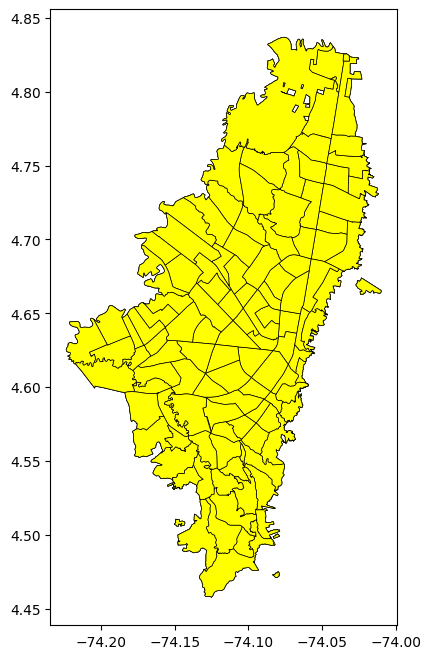

In [7]:
# Plot the bus Bogota UPZ's

# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(16, 8))
upz_map.plot(ax=ax, edgecolor="black", facecolor="yellow", linewidth=0.5)
# show the plot
plt.show()

We can create a plot for data visualization where we can divide our UPZ's into the localities to denote the difference this two geographic units, and also is usefull because it shows the information that our dataset table contains, for example the Localities. We will put on our legend the name of each one of them. There is one locality that will not be part of the analysis, and is Sumapaz which is mainly rural (Hernandez, 2021), and our main focus is on the impact of Urban Areas.

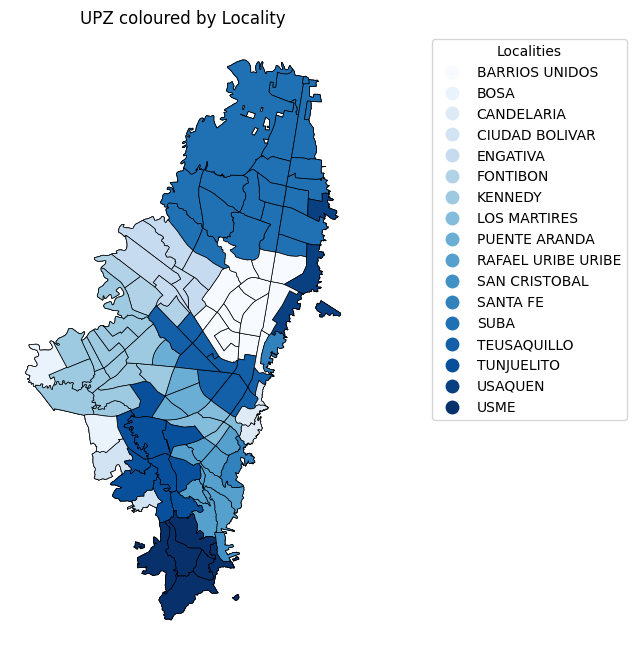

In [8]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the UPZ by the locality
# Add legend (legend = True)
upz_map.plot(ax=ax, column ='LocNombre', edgecolor="black", cmap="Blues",
             linewidth=0.5, legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.8, 1.0))
leg.set_title("Localities")

# remove axis
ax.set_axis_off()
# set title
ax.set_title('UPZ coloured by Locality')
# show plot
plt.show();

# Air Quality

The second dataset contains information on air quality in the city of Bogotá, obtained from the city's multiple monitoring stations. This information is obtained from the datos.gov.co website, which contains national data, and is compiled by the Institute of Hydrology, Meteorology and Environmental Studies (IDEAM). Its last update was on January 26 (IDEAM 2026), as this information is collected and analyzed monthly. The data recorded there are at the national level; therefore, we must perform data cleaning procedures to obtain the information we need in the most suitable format.

In [9]:
#Read the csv file for air quality
air_quality = pd.read_csv('/content/air_quality.csv')
air_quality.head()

,:id,:version,:created_at,:updated_at,id_estacion,autoridad_ambiental,estaci_n,latitud,longitud,variable,...,m_ximo,fechas_horas_del_m_ximo,m_nimo,fechas_horas_del_m_nimo,d_as_de_excedencias,c_digo_del_departamento,nombre_del_departamento,c_digo_del_municipio,nombre_del_municipio,tipo_de_estaci_n
0,row-wmwz.79yt.59wq,rv-i46v-c87s.jdm2,2026/01/26 14:32:34.439+00,2026/01/26 14:32:34.439+00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,...,359.5,29/11/2011 01:00,1.3,29/11/2011 07:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija
1,row-nwhu.4ewb.i39v,rv-c6sq~rd5h_f9mh,2026/01/26 14:32:34.439+00,2026/01/26 14:32:34.439+00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,...,336.8,16/11/2011 00:00,99.7,08/11/2011 00:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija
2,row-y8cb_7vnv_u9i3,rv-vkyr-kr9s~25up,2026/01/26 14:32:34.439+00,2026/01/26 14:32:34.439+00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,...,23.0,20/12/2011 02:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija
3,row-xk8q~siy9.gbtq,rv-dewt_4r3n-mzby,2026/01/26 14:32:34.439+00,2026/01/26 14:32:34.439+00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,...,649.8,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija
4,row-kgds.gruf.wv95,rv-7vu5_xzfu_qnjy,2026/01/26 14:32:34.439+00,2026/01/26 14:32:34.439+00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,...,647.9,20/10/2011 00:00,644.0,27/10/2011 00:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija


In [10]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Calidad_del_Aire/Calidad_Del_Aire.geojson"
#Read the geodata of air quality
air_map = gpd.read_file(path)
air_map.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,:id,:version,:created_at,:updated_at,id_estacion,autoridad_ambiental,estaci_n,latitud,longitud,variable,...,fechas_horas_del_m_ximo,m_nimo,fechas_horas_del_m_nimo,d_as_de_excedencias,c_digo_del_departamento,nombre_del_departamento,c_digo_del_municipio,nombre_del_municipio,tipo_de_estaci_n,geometry
0,row-wmwz.79yt.59wq,rv-i46v-c87s.jdm2,2026-01-26 14:32:34.439000+00:00,2026-01-26 14:32:34.439000+00:00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.44399 6.37852)
1,row-nwhu.4ewb.i39v,rv-c6sq~rd5h_f9mh,2026-01-26 14:32:34.439000+00:00,2026-01-26 14:32:34.439000+00:00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,DViento,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.44399 6.37852)
2,row-y8cb_7vnv_u9i3,rv-vkyr-kr9s~25up,2026-01-26 14:32:34.439000+00:00,2026-01-26 14:32:34.439000+00:00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,PLiquida,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.44399 6.37852)
3,row-xk8q~siy9.gbtq,rv-dewt_4r3n-mzby,2026-01-26 14:32:34.439000+00:00,2026-01-26 14:32:34.439000+00:00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.44399 6.37852)
4,row-kgds.gruf.wv95,rv-7vu5_xzfu_qnjy,2026-01-26 14:32:34.439000+00:00,2026-01-26 14:32:34.439000+00:00,9020,AMVA,I.E. COL. COLOMBIA,6.378517,-75.443986,P,...,20/10/2011 0:00,644,27/10/2011 0:00,0,5,ANTIOQUIA,5308.0,GIRARDOTA,Fija,POINT (-75.44399 6.37852)


Here we will do our first cleaning process, because our Air Quality data contains the information for all the country. We will focus on Urban Bogota, so we need to create a subset of data that will contain only the information of the stations that are located in the capital.

In [11]:
# Subset with the value in column nombre_del_departamento == 'BOGOTA, D.C.'
air_bogota = air_map[air_map["nombre_del_departamento"] == "BOGOTA, D.C."]


In [12]:
air_bogota.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

After we confirm that both of the datasets are with the same Coordinate Referenc System (CRS) we can proceed to make the join of the dataset. Since we do not have the same amount of rows, we need to proceed to make the join considering the nearest point and match the information for all the rows of the UPZ

In [13]:
#Join the air quality and upz datasets (both already with coordinates added)
air_upz = gpd.sjoin_nearest(upz_map, air_bogota, how="left")
air_upz


,OBJECTID,UPlCodigo,UPlNombre,SHAPE_Leng,LocNombre,LocCodigo,idred,RedIntregr,SHAPE_Le_1,SHAPE_Area,...,m_ximo,fechas_horas_del_m_ximo,m_nimo,fechas_horas_del_m_nimo,d_as_de_excedencias,c_digo_del_departamento,nombre_del_departamento,c_digo_del_municipio,nombre_del_municipio,tipo_de_estaci_n
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,...,43.3,44596.5,1.9,44731.5,1,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,...,123.3,44595.416666666664,1.8,44732.291666666664,64,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,...,4110.4,4/11/2021 9:00,532.5,11/10/2021 4:00,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,...,75.2,44670.5,36.7,44921.5,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
0,1.0,UPZ100,GALERIAS,0.060563,BARRIOS UNIDOS,12,4.0,Territorio Red Norte,0.060563,0.000193,...,3671.3,5/11/2021 1:00,727.1,17/10/2021 6:00,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,354.0,1,UPR ZONA NORTE,0.613634,SUBA,11,4.0,Territorio Red Norte,0.613634,0.003057,...,86.6,44889.166666666664,0.6,21/09/2022 04:00:00 - 21/09/2022 05:00:00 - ...,0,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija
344,354.0,1,UPR ZONA NORTE,0.613634,SUBA,11,4.0,Territorio Red Norte,0.613634,0.003057,...,98.6,44827.291666666664,0,12/01/2022 10:00:00 - 12/01/2022 11:00:00 - ...,0,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija
344,354.0,1,UPR ZONA NORTE,0.613634,SUBA,11,4.0,Territorio Red Norte,0.613634,0.003057,...,171.4,44897.25,0,12/01/2022 10:00:00 - 12/01/2022 11:00:00 - ...,0,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija
344,354.0,1,UPR ZONA NORTE,0.613634,SUBA,11,4.0,Territorio Red Norte,0.613634,0.003057,...,358.1,44821.5,2.1,44850.5,0,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija


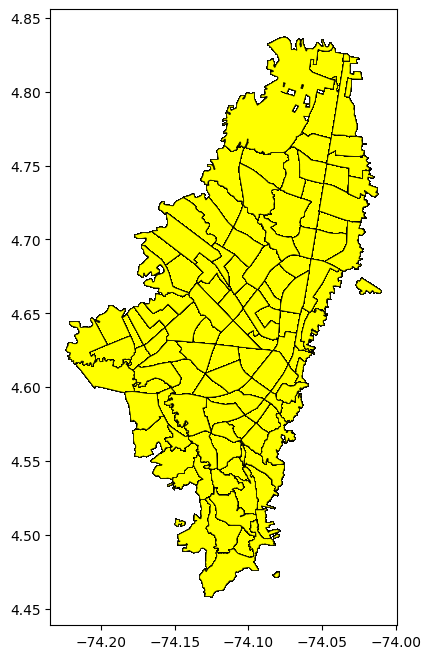

In [14]:
# Plot the new dataset spatially
f, ax = plt.subplots(1, figsize=(16, 8))
air_upz.plot(ax=ax, edgecolor="black", facecolor="yellow", linewidth=0.5)
# show the plot
plt.show()

In [15]:
#Get the information of the new dataset
air_upz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 28980 entries, 0 to 344
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   OBJECTID                       28980 non-null  float64            
 1   UPlCodigo                      28980 non-null  object             
 2   UPlNombre                      28980 non-null  object             
 3   SHAPE_Leng                     28980 non-null  float64            
 4   LocNombre                      28980 non-null  object             
 5   LocCodigo                      28980 non-null  object             
 6   idred                          28980 non-null  float64            
 7   RedIntregr                     28980 non-null  object             
 8   SHAPE_Le_1                     28980 non-null  float64            
 9   SHAPE_Area                     28980 non-null  float64            
 10  geometry             

Our main numeric column of interest is called 'promedio' and we can identify that this column remains as an object. For this reason first, we need to convert this column into a numeric column for all the process, and then we need to rename this column to english, since it will be mentioned during the rest of the analysis.

In [16]:
#Convert column of interest to numeric
air_upz["promedio"] = pd.to_numeric(air_upz["promedio"], errors="coerce")


In [17]:
#Rename column of interest
air_upz = air_upz.rename(columns={"promedio": "average"})

Now, we need to create the subsets for our selected contaminants. We selected the three main that are Carbon Monoxide (CO), Nitrogen Oxides (NO2) and Sulphur Dioxides (SO2) (Seinfeld and Pandis, 2016). This three components are measured in the stations and coincidentally they had the biggest values, specially CO (see above the main statistics). So for this reason, we need to call the column variable which is the one that contains this information all together, and then we can proceed to create our new datasets.

In [18]:
# Subset with the value in column variable and the main contaminants
air_NO2 = air_upz[air_upz["variable"] == "NO2"]
air_CO = air_upz[air_upz["variable"] == "CO"]
air_SO2 = air_upz[air_upz["variable"] == "SO2"]
air_SO2.head()

,OBJECTID,UPlCodigo,UPlNombre,SHAPE_Leng,LocNombre,LocCodigo,idred,RedIntregr,SHAPE_Le_1,SHAPE_Area,...,m_ximo,fechas_horas_del_m_ximo,m_nimo,fechas_horas_del_m_nimo,d_as_de_excedencias,c_digo_del_departamento,nombre_del_departamento,c_digo_del_municipio,nombre_del_municipio,tipo_de_estaci_n
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.00012,...,23.7,44921.5,1.5,44674.5,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.00012,...,12.4,14/10/2021 12:00,0.4,11/01/2021 12:00,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.00012,...,53.9,19/12/2021 9:00,0,05/01/2021 01:00:00 - 07/01/2021 02:00:00 - ...,0,11,"BOGOTA, D.C.",11001.0,"BOGOTA, D.C.",Fija
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.00012,...,53.9,19/12/2021 9:00,0,05/01/2021 01:00:00 - 07/01/2021 02:00:00 - ...,0,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija
1,2.0,UPZ83,LAS MARGARITAS,0.058093,KENNEDY,08,2.0,Territorio Red Sur Occidente,0.058093,0.00012,...,101.9,44921.083333333336,0,44673.208333333336,1,11,"BOGOTA, D.C.",11001,"BOGOTA, D.C.",Fija


# **VISUALS AND STATISTICS**

We can review simple statistical values such as the mean, quartiles, min and max, and standard deviation for the column average in each one of our subsets. We can see that CO have the biggest levels so far with a mean of 801.7, then is NO2 with a mean of 29.1 and finally SO2 with a mean of 5.7. Also we can identify that the lower amount of registers belongs to NO2 and the highest (almost duplicated) belongs to CO.

In [19]:
air_CO.describe()

,OBJECTID,SHAPE_Leng,idred,SHAPE_Le_1,SHAPE_Area,index_right,average
count,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,175.237443,0.093974,3.022831,0.093974,0.000316,19265.965753,801.723744
std,102.013046,0.059802,1.112381,0.059802,0.000297,7510.401247,418.251042
min,1.000000,0.011734,1.000000,0.011734,0.000006,9000.000000,287.900000
25%,86.000000,0.064912,2.000000,0.064912,0.000176,12129.000000,545.000000
50%,176.000000,0.084096,3.000000,0.084096,0.000280,19750.000000,665.700000
75%,263.000000,0.107541,4.000000,0.107541,0.000370,27485.000000,931.800000
max,354.000000,0.613634,4.000000,0.613634,0.003057,27891.000000,2512.700000


In [20]:
air_NO2.describe()

,OBJECTID,SHAPE_Leng,idred,SHAPE_Le_1,SHAPE_Area,index_right,average
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,175.056769,0.095324,2.951965,0.095324,0.000318,19120.299127,29.126201
std,101.977225,0.059544,1.142068,0.059544,0.000293,7567.485001,7.727401
min,1.000000,0.011734,1.000000,0.011734,0.000006,9665.000000,11.100000
25%,85.250000,0.066365,2.000000,0.066365,0.000176,11951.000000,24.900000
50%,175.000000,0.085272,3.000000,0.085272,0.000281,18409.500000,29.800000
75%,264.000000,0.110476,4.000000,0.110476,0.000375,25926.000000,35.000000
max,354.000000,0.613634,4.000000,0.613634,0.003057,27897.000000,47.600000


In [21]:
air_SO2.describe()

,OBJECTID,SHAPE_Leng,idred,SHAPE_Le_1,SHAPE_Area,index_right,average
count,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000
mean,176.087838,0.100042,2.621622,0.100042,0.000345,19212.542230,5.696284
std,102.099356,0.069919,1.216258,0.069919,0.000349,7595.445688,4.357267
min,2.000000,0.011734,1.000000,0.011734,0.000006,8952.000000,1.400000
25%,82.500000,0.070829,2.000000,0.070829,0.000206,12137.750000,3.000000
50%,177.000000,0.087332,2.000000,0.087332,0.000290,19166.000000,4.150000
75%,265.500000,0.117831,4.000000,0.117831,0.000401,27498.000000,7.500000
max,354.000000,0.613634,4.000000,0.613634,0.003057,27908.000000,22.600000


Then we can plot the average as a barplot per locality to understand better how it is moving around this, and also to identify if this type of plot suits for the final result, as we need to have as results graphics that are easy of understand. For that reason we create three plots, each for the subsets.

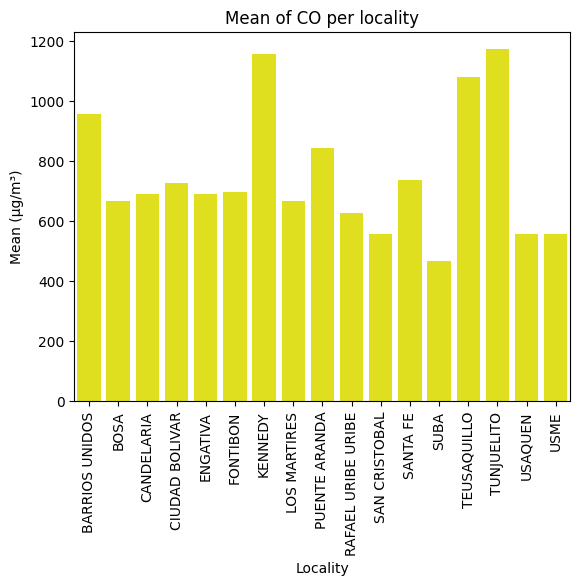

In [22]:
# Mean UPZ
mean = air_CO.groupby("LocNombre")["average"].mean().reset_index()

# Gráfica de barras
sns.barplot(data=mean, x="LocNombre", y="average", color="yellow")

#Set names and rotation
plt.xticks(rotation=90)  # rotar etiquetas si son muchas
plt.ylabel("Mean (µg/m³)")
plt.xlabel("Locality")
plt.title("Mean of CO per locality")
plt.show()


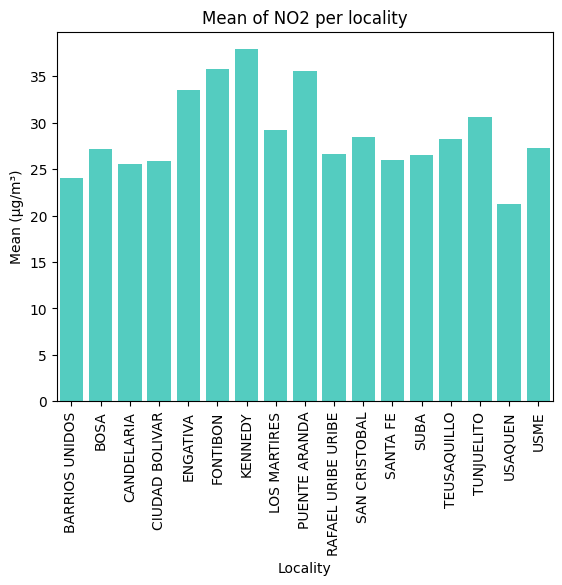

In [23]:
# Mean UPZ
mean = air_NO2.groupby("LocNombre")["average"].mean().reset_index()

# Plot the data
sns.barplot(data=mean, x="LocNombre", y="average", color="turquoise")

#Set names and rotation
plt.xticks(rotation=90)  # rotar etiquetas si son muchas
plt.ylabel("Mean (µg/m³)")
plt.xlabel("Locality")
plt.title("Mean of NO2 per locality")
plt.show()

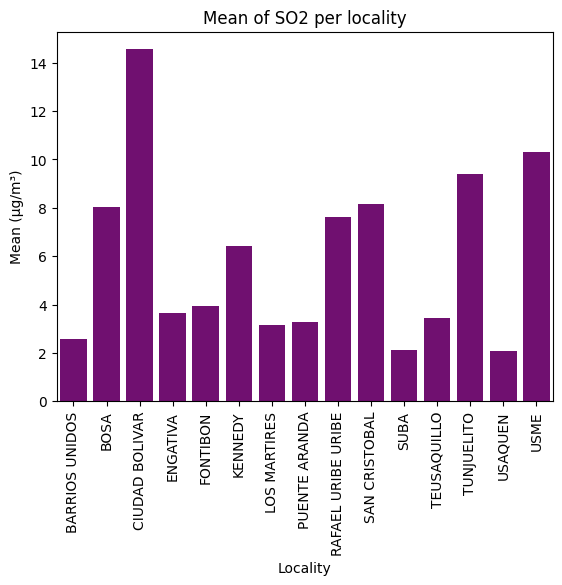

In [24]:
# Mean UPZ
mean = air_SO2.groupby("LocNombre")["average"].mean().reset_index()

# Plot the data
sns.barplot(data=mean, x="LocNombre", y="average", color="purple")

#Set names and rotation
plt.xticks(rotation=90)
plt.ylabel("Mean (µg/m³)")
plt.xlabel("Locality")
plt.title("Mean of SO2 per locality")
plt.show()

We can identify here that for NO2 Kennedy is the locality with the highest levels, for SO2 is Ciudad Bolivar with a high difference followed by Usme. For CO Tunjuelito is very close to Kennedy, and this starts to make Kennedy one of the most problematic localities for air contamination.

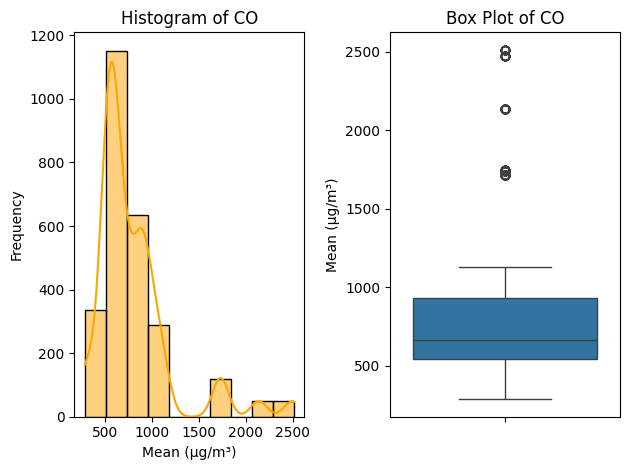

In [25]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(air_CO['average'], bins=10, kde=True, color='orange')
plt.title('Histogram of CO')
plt.xlabel('Mean (µg/m³)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=air_CO['average'])
plt.title('Box Plot of CO')
plt.ylabel('Mean (µg/m³)')

plt.tight_layout()
plt.show()

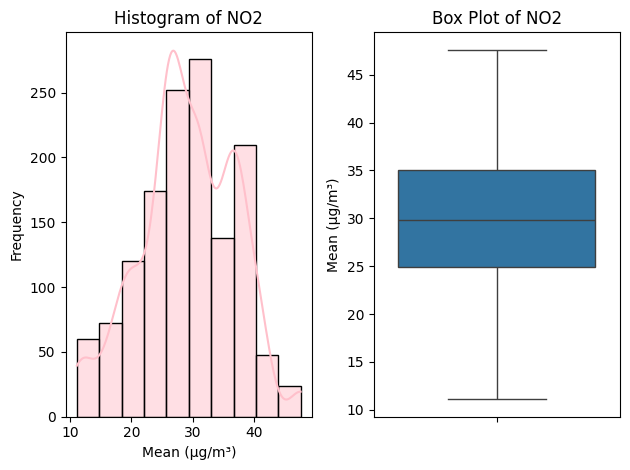

In [26]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(air_NO2['average'], bins=10, kde=True, color='pink')
plt.title('Histogram of NO2')
plt.xlabel('Mean (µg/m³)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=air_NO2['average'])
plt.title('Box Plot of NO2')
plt.ylabel('Mean (µg/m³)')

plt.tight_layout()
plt.show()

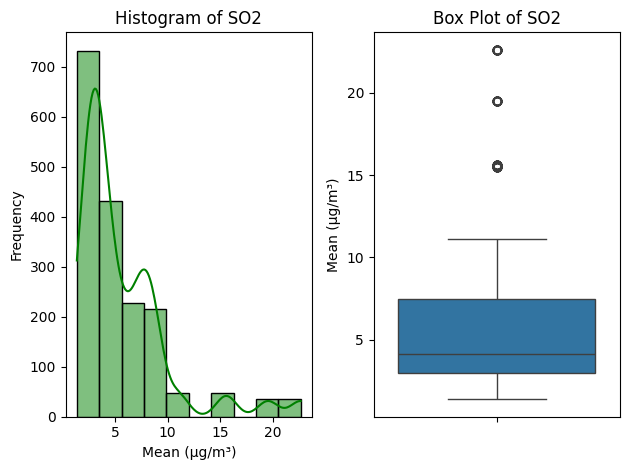

In [27]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(air_SO2['average'], bins=10, kde=True, color='green')
plt.title('Histogram of SO2')
plt.xlabel('Mean (µg/m³)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=air_SO2['average'])
plt.title('Box Plot of SO2')
plt.ylabel('Mean (µg/m³)')

plt.tight_layout()
plt.show()

The histogram and box plots for each one of the toxic gasses shows that NO2 remains with an average trend, however SO2 Y CO had anomalies, the first one have lower values mainly, the monoxid on the other hand have great fluctations that are visible on the boxplot. This can lead us to think that this result could be due to special factors of contamination or specific alterations during the month, caused by this factors.

# **NON-SPATIAL RESULT**

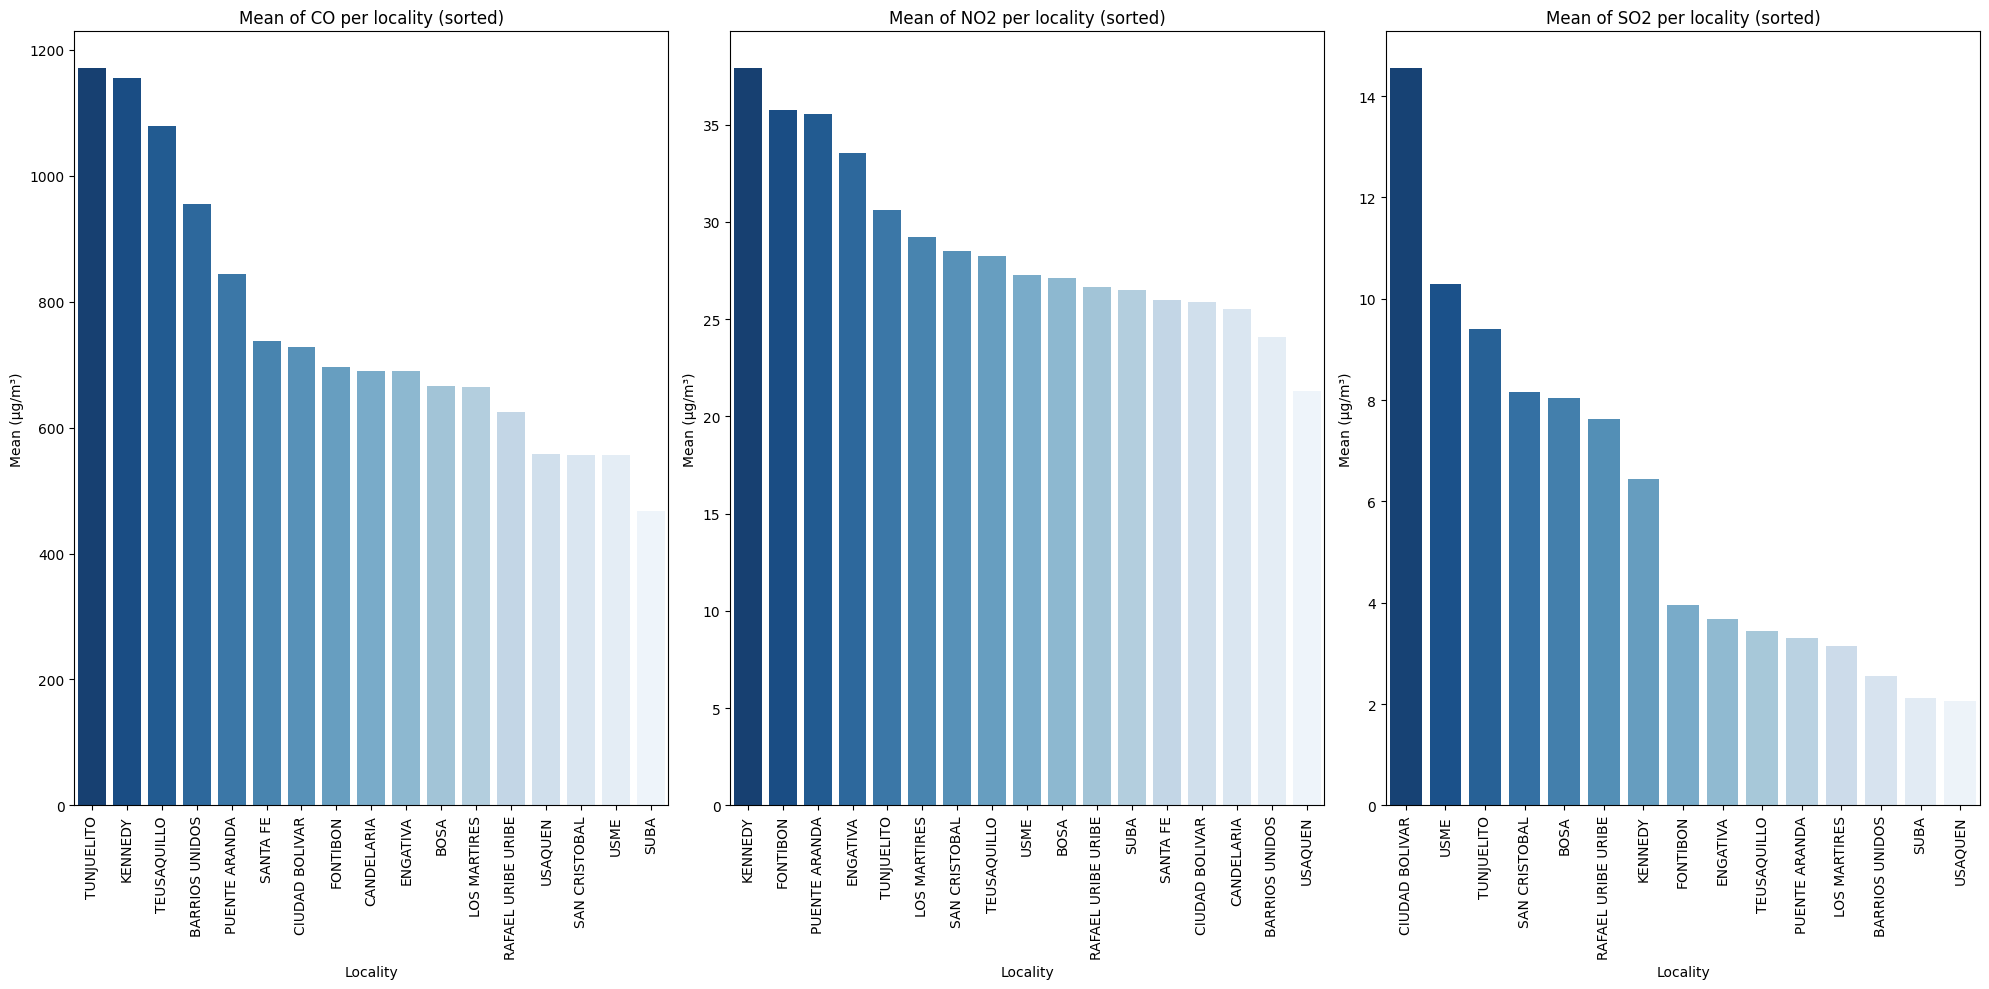

In [28]:
#Set the mean groups
mean_CO = air_CO.groupby("LocNombre")["average"].mean().reset_index()
mean_CO = mean_CO.sort_values("average", ascending=False)

mean_NO2 = air_NO2.groupby("LocNombre")["average"].mean().reset_index()
mean_NO2 = mean_NO2.sort_values("average", ascending=False)

mean_SO2 = air_SO2.groupby("LocNombre")["average"].mean().reset_index()
mean_SO2 = mean_SO2.sort_values("average", ascending=False)

#Plot the figures
fig, axes = plt.subplots(1, 3, figsize=(20,10))

sns.barplot(data=mean_CO, x="LocNombre", y="average", palette="Blues_r", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("Mean (µg/m³)")
axes[0].set_xlabel("Locality")
axes[0].set_title("Mean of CO per locality (sorted)")

sns.barplot(data=mean_NO2, x="LocNombre", y="average", palette="Blues_r", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("Mean (µg/m³)")
axes[1].set_xlabel("Locality")
axes[1].set_title("Mean of NO2 per locality (sorted)")

sns.barplot(data=mean_SO2, x="LocNombre", y="average", palette="Blues_r", ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylabel("Mean (µg/m³)")
axes[2].set_xlabel("Locality")
axes[2].set_title("Mean of SO2 per locality (sorted)")

plt.tight_layout()
plt.show()

This is oriented to all public. With the results we can identify better if we sorted and put together the three subsets. They were coloured by a blue scale in order that at this way even a color blind audience will be able to visualize this information. Kennedy is the Locality that leads the average levels of contaminants, is the worst for NO2 and second for CO. NO2 comes mainly from the traffic and from the industry, and Kennedy is known as one of the most populated and therefore with the worst traffic area of the city, also, there is an important industrial area here, which also makes Fontibon the second because this locality is one of the most industrialised ones. CO concentrations are bigger than the others because they come from almost everything: homes, transport, industries, fires, etc. Tunjuelito is the main one and here could affect the population and the popular biomass burning in this area. For SO2 Ciudad Bolivar is the most contaminated and Usme is next, and this contaminant comes from refinerys, smelters and other type of mining processes, and this localities In fact, they have the highest level of mining operations in the city; even in Ciudad Bolívar, there is talk of open-pit mining (Grisales and Porras, 2022). The classification of the origin comes from Seinfeld and Pandis (2016). SO2 is not available for all the city.












# **SPATIAL RESULT**

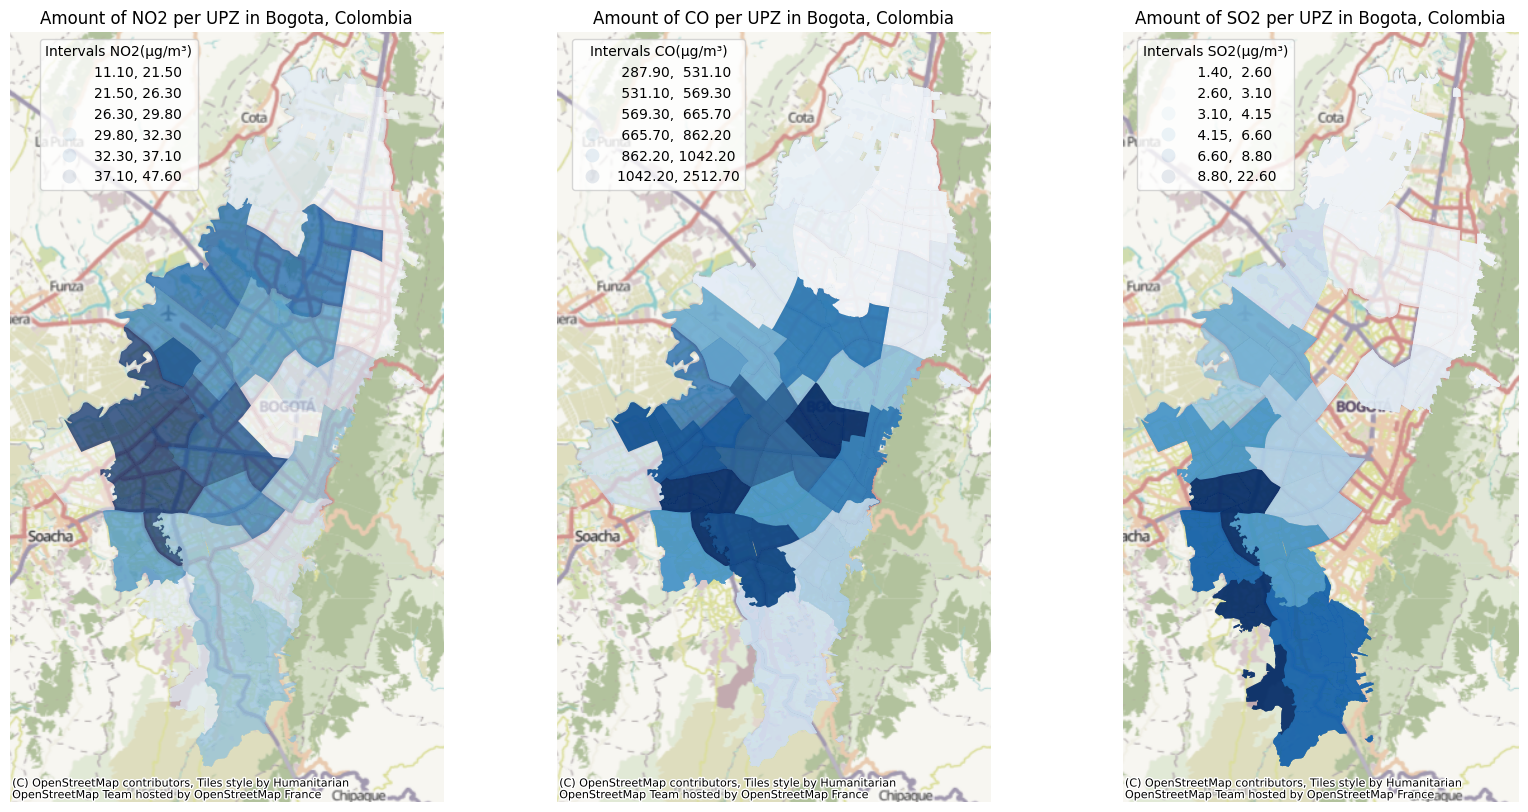

In [29]:
# Define plot size
f,ax = plt.subplots(1, 3, figsize=(20,10))

# Plot the map based on
# Plot and arrange the result
air_NO2.plot(column="average", cmap="Blues", scheme="Quantiles", k=6, alpha=0.1,
             legend =True, ax=ax[0])
#Add Basemap
ctx.add_basemap(ax[0], crs=air_NO2.crs)
# remove axis
ax[0].set_axis_off()
# set title
ax[0].set_title('Amount of NO2 per UPZ in Bogota, Colombia')
# Get the legend
leg1 = ax[0].get_legend()
leg1.set_title("Intervals NO2(µg/m³)")

# Plot and arrange the result
air_CO.plot(column="average", cmap="Blues", scheme="Quantiles", k=6, alpha=0.1,
            legend =True, ax=ax[1])
#Add Basemap
ctx.add_basemap(ax[1], crs=air_CO.crs)
# remove axis
ax[1].set_axis_off()
# set title
ax[1].set_title('Amount of CO per UPZ in Bogota, Colombia')
# Get the legend
leg2 = ax[1].get_legend()
leg2.set_title("Intervals CO(µg/m³)")

# Plot and arrange the result
air_SO2.plot(column="average", cmap="Blues", scheme="Quantiles", k=6, legend =True,
             alpha=0.1, ax=ax[2])
#Add Basemap
ctx.add_basemap(ax[2], crs=air_SO2.crs)
# remove axis
ax[2].set_axis_off()
# set title
ax[2].set_title('Amount of SO2 per UPZ in Bogota, Colombia')
# Get the legend
leg3 = ax[2].get_legend()
leg3.set_title("Intervals SO2(µg/m³)")

# Move the graphic
leg1.set_bbox_to_anchor((0.45, 1.0))
leg2.set_bbox_to_anchor((0.45, 1.0))
leg3.set_bbox_to_anchor((0.45, 1.0))

# show plot
plt.show();

This is oriented to all public. We can identify here the patterns for each one of the gases. Visually we identify that the most contaminated areas are located in the south, especially southwest of the city, this area is also the most populated area which also coincides with lower incomes. We can identify for example that in the area of NO2 that is more blue (dark) there is a probability of higher traffic in this area, CO shows definitely a more populated area, because it coincides with higher human activity. and the southern part is the area with mining processes in the city. With this and adding the basemap people can understand where they are located and how affected they are about each one of this contaminants. About SO2 absence, is not strictly important in this areas since there are not mining or smelter processes there.

# **REFERENCES**

Datos Abiertos Bogotá (2024) Territorios redes salud por UPZ. [Accessed 01 February 2026]. Available from: https://datosabiertos.bogota.gov.co/en/dataset/territorios-redes-salud-por-upz (Accedido: 6 febrero 2026).

Escobar, B.S.A., Boso, A. and Vallejos-Romero, A. 2023. Air pollution, well-being and quality of life in Latin America: a systematic review. Revista iberoamericana de estudios de desarrollo= Iberoamerican journal of development studies, 12(2), pp.236-260. [Accessed 04 February 2026]. Available from: https://dialnet.unirioja.es/servlet/articulo?codigo=9188178

Espinosa, J.F.M., Herrera, L.C.P., Remolina, B.R.G. and Quinche, J.E.P. 2017. Estimación de factores de emisión de material particulado resuspendido antes, durante y después de la pavimentación de una vía en Bogotá. Ciencia e Ingeniería Neogranadina, 27(1), pp.43-60. [Accessed 04 February 2026]. Available from: https://doi.org/10.18359/rcin.1797

Franco, J.F., Gidhagen, L., Morales, R. and Behrentz, E., 2019. Towards a better understanding of urban air quality management capabilities in Latin America. Environmental Science & Policy, 102, pp.43-53. [Accessed 04 February 2026]. Available from: https://doi.org/10.1016/j.envsci.2019.09.011

Gaitán, M., Cancino, J. and Behrentz, E., 2007. Análisis del estado de la calidad del aire en Bogotá. Revista de ingeniería, (26), pp.81-92. [Accessed 04 February 2026]. Available from: https://doi.org/10.16924/revinge.26.10

Grisales, M.A.C.V. and Porras, C.A.G. 2022. Lineamientos estratégicos dirigidos a la protección del Capita Natural Crítico de explotación minera en el" Parque Minero industrial El Mochuelo" en la localidad de Ciudad Bolívar en la ciudad de Bogotá. proyecto investigativo. Universidad Distrital Francisco José de Caldas, Admisnistración ambiental, Bogotá DC Recuperado el, 13. [Accessed 04 February 2026]. Available from: http://hdl.handle.net/11349/33286

Hernandez, C.T. 2021. Habitabilidad y Ruralidad: Modelos De Vivienda Para Zona Rural De Bogotá Dc (Doctoral dissertation, UNIVERSIDAD PILOTO DE COLOMBIA). [Accessed 04 February 2026]. Available from: https://repository.unipiloto.edu.co/bitstream/handle/20.500.12277/10607/TRIANA.%20C.%20SEM%20X-G09%20final.pdf?sequence=1

Instituto de Hidrología, Meteorología y Estudios Ambientales – IDEAM (2026) Publicaciones SISAIRE - Calidad del Aire. [Accessed 01 February 2026]. Available from: http://sisaire.ideam.gov.co/ideam-sisaire-web/publicaciones.xhtml?clase=DOCUMENTOS


Liang, Y., Xia, Y., Ke, S., Wang, Y., Wen, Q., Zhang, J., Zheng, Y. and Zimmermann, R. 2023, June. Airformer: Predicting nationwide air quality in china with transformers. In Proceedings of the AAAI conference on artificial intelligence (Vol. 37, No. 12, pp. 14329-14337). [Accessed 04 February 2026]. Available from: https://doi.org/10.1609/aaai.v37i12.26676

Lu, J., Li, B., Li, H. and Al-Barakani, A. 2021. Expansion of city scale, traffic modes, traffic congestion, and air pollution. Cities, 108, p.102974. [Accessed 04 February 2026]. Available from: https://doi.org/10.1016/j.cities.2020.102974

Manisalidis, I., Stavropoulou, E., Stavropoulos, A. and Bezirtzoglou, E. 2020. Environmental and health impacts of air pollution: a review. Frontiers in public health, 8, p.14. [Accessed 04 February 2026]. Available from: https://doi.org/10.3389/fpubh.2020.00014

Marselle, M.R., Lindley, S.J., Cook, P.A. and Bonn, A. 2021. Biodiversity and health in the urban environment. Current environmental health reports, 8(2), pp.146-156. [Accessed 04 February 2026]. Available from:
https://doi.org/10.1007/s40572-021-00313-9

Seinfeld, J. H. & Pandis, S. N. 2016.Preface to the Third Edition, in Atmospheric Chemistry and Physics. United States: John Wiley & Sons, Incorporated. p. [Accessed 05 February 2026]. Available from: https://discovered.ed.ac.uk/permalink/44UOE_INST/1viuo5v/cdi_proquest_ebookcentralchapters_4462549_7_27

Wang, A., Paul, S., Desouza, P., Machida, Y., Mora, S., Duarte, F. and Ratti, C., 2023. Key themes, trends, and drivers of mobile ambient air quality monitoring: a systematic review and meta-analysis. Environmental Science & Technology, 57(26), pp.9427-9444. [Accessed 04 February 2026]. Available from: https://doi.org/10.1021/acs.est.2c06310
